In [1]:
from lea_utils import SimulatorLEA
from lea_utils import norm_values
from lea_utils import PlotLEA, split_sequences
import numpy as np
import pandas as pd

In [2]:
#Intancia do simulador
simulador=SimulatorLEA()
filepath="./dados_experimentais/Dados_BCSLEA_20210818.mat"
#Carregar dados experimentais
intervalo_horas=(0,7) #Janela de simulação em horas escolhida com base no histórico de dados
simulador.getLEAdata(filepath,intervalo_horas)


0
 File loaded ./dados_experimentais/Dados_BCSLEA_20210818.mat


In [3]:
fk,zc,pman,pres=simulador.BCS_EXP.get_exo_values() # Armazenamento dos valores das exógenas
x1,x2,x3=simulador.BCS_EXP.get_ss_values() # Armazenamento dos valores dos estados

maxtime = fk.shape[0]
nsim=maxtime

In [4]:
x1=np.reshape(x1,(maxtime,1))
x2=np.reshape(x2,(maxtime,1))
x3=np.reshape(x3,(maxtime,1))
fk=np.reshape(fk,(maxtime,1))
zc=np.reshape(zc,(maxtime,1))
pman=np.reshape(pman,(maxtime,1))
pres=np.reshape(pres,(maxtime,1))

3


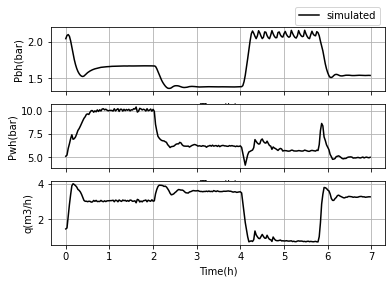

In [5]:
xc,x0=norm_values()
xc=xc.T;x0=x0.T
x1n=(x1-x0[0])/xc[0]
x2n=(x2-x0[1])/xc[1]
x3n=(x3-x0[2])/xc[2]
tempo=simulador.BCS_EXP.tempo_hora
x=[x1,x2,x3]
print(len(x))
Fig_states=simulador.plotLEA.plot_states([x],tempo)


Scaling external inputs

$q_{ch}=Cc\cdot \sqrt{k_n}(\underbrace{Z_c/100}_{Z_n})\sqrt{\underbrace{\frac{|P_{wh}-p_m|}{k_n}}}_{P_{mn}}, ~ q_r=PI\cdot10^5\cdot\underbrace{10^{-5}(P_r-P_{bh})}_{P_{rn}}, ~ H=CH\cdot H0\left(\underbrace{\frac{f_q}{f_0}}_{f_n}\right)^2$

Kn escolhido para tornar Pmn entre 0 e 1

In [6]:
#Reescalin Pres
prn=(pres-1.75e5)/0.4e5

In [7]:
u=np.hstack([fk.reshape(len(fk),1),zc.reshape(len(fk),1),pman.reshape(len(fk),1),pres.reshape(len(fk),1)])
Cc=2e-5;
kn=(25*1e5)
pmn=(x2-pman)/kn; #Cc=Cc/sqrt(kn)
un=np.hstack([fk.reshape(len(fk),1)/60,zc.reshape(len(fk),1)/100, pmn, prn])
print(u.shape,print(x1.shape))
df = pd.DataFrame(np.hstack([un,x1,x2,x3]),columns=['f','z','pm','pr','pbh','pwh','q'])

(252, 1)
(252, 4) None


In [8]:
#checking scaling
qch = (zc/100.0)*Cc * np.sqrt(kn)*np.sqrt(np.abs(pmn));
print(qch.max(),qch.min())
qch = (zc/100.0)*Cc * np.sqrt(np.abs(x2-pman));
print(qch.max(),qch.min())

0.0074922224 0.0014354885
0.0074922233 0.0014354886


[1, 1, 1, 1]


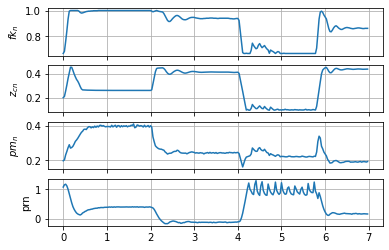

In [9]:
label = [r'$fk_n$',r'$z_{cn}$', r"$pm_n$","prn"];
scale_plot=[1, 1, 1, 1]

#scale_plot=[1, 1, 1, 1]
Figura=PlotLEA()
Figura.update_label_u(label)
Figura.update_scale_u(scale_plot)
Fig_u=Figura.plot_exogenous(un.T,tempo)
print(Figura.u_scale)

In [10]:
df = pd.DataFrame(np.hstack([un,x1n,x2n,x3n]),columns=['fn','zn','pmn','prn','pbhn','pwhn','qn'])
# Defining a batch size based on the data
nvar=len(df.columns)
#pd.set_option('display.precision', 3)
df.head(n=6)

,fn,zn,pmn,prn,pbhn,pwhn,qn
0,0.666667,0.200000,0.198460,1.071875,0.697083,0.343937,0.277832
1,0.683333,0.210000,0.203692,1.148438,0.726250,0.358298,0.288967
2,0.758333,0.255000,0.232085,1.168750,0.734583,0.437571,0.425861
3,0.841667,0.305000,0.251907,1.110937,0.718750,0.492718,0.558278
4,0.933333,0.360000,0.273869,0.995313,0.676667,0.554183,0.671926
5,0.995000,0.405000,0.290620,0.839063,0.619583,0.600426,0.773291
6,1.000000,0.452850,0.271212,0.675000,0.559583,0.546428,0.796307
7,1.000000,0.452184,0.274531,0.532813,0.505833,0.554183,0.787411


In [11]:
dset = df.values.astype(float)

In [13]:
n_steps_in, n_steps_out = 30 ,10# convert into input/output
a, b,c= split_sequences(dset, n_steps_in, n_steps_out)
X=a[:,:,:]
y=b[:,:,-3:]
u_train=b[:,:,0:3]
print ("X.shape" , X.shape) 
print ("y.shape" , y.shape)
print ("u_train.shape" , u_train.shape)

X.shape (213, 30, 7)
y.shape (213, 10, 3)
u_train.shape (213, 10, 3)
